In [1]:
import yfinance as yf
from sklearn import preprocessing
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
company="BTC-INR"
interval = 60

In [3]:
stocks = yf.Ticker(company)
df=stocks.history(start='2001-01-19', end='2022-05-13', actions=False)
df=df.drop(['Open','High','Volume','Low'],axis=1)
data=df.values
train_len=math.ceil(len(data)*0.95)
min_max_scalar=preprocessing.MinMaxScaler()
scaled_data=min_max_scalar.fit_transform(data)
train_data=scaled_data[0:train_len,:]
x_train=[]
y_train=[]
for i in range(interval,len(train_data)):
    x_train.append(train_data[i-interval:i,0])
    y_train.append(train_data[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print(x_train.shape)

(605, 60, 1)


In [4]:
import keras
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
from keras import optimizers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization,LSTM
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
import numpy as np
# np.random.seed(4)
# from tensorflow import set_random_seed
# set_random_seed(4)
from keras.callbacks import EarlyStopping,ModelCheckpoint

stop = EarlyStopping(
    monitor='val_loss', 
    mode='min',
    patience=50
)

checkpoint= ModelCheckpoint(
    filepath='./',
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

model=Sequential()
model.add(LSTM(150,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(50))
model.add(Dense(1))

adam = optimizers.Adam(lr=0.0005)

model.compile(optimizer=adam, loss='mse')

In [5]:
history=model.fit(x=x_train, y=y_train, batch_size=16, epochs=200, shuffle=True, validation_split=0.1, callbacks = [stop, checkpoint])

Epoch 1/200
34/34 [==============================] - 5s 67ms/step - loss: 0.0338 - val_loss: 0.0177
Epoch 2/200
34/34 [==============================] - 1s 33ms/step - loss: 0.0021 - val_loss: 0.0106
Epoch 3/200
34/34 [==============================] - 1s 33ms/step - loss: 0.0021 - val_loss: 0.0115
Epoch 4/200
34/34 [==============================] - 1s 33ms/step - loss: 0.0018 - val_loss: 0.0236
Epoch 5/200
34/34 [==============================] - 1s 33ms/step - loss: 0.0019 - val_loss: 0.0217
Epoch 6/200
34/34 [==============================] - 1s 33ms/step - loss: 0.0020 - val_loss: 0.0091
Epoch 7/200
34/34 [==============================] - 1s 33ms/step - loss: 0.0022 - val_loss: 0.0226
Epoch 8/200
34/34 [==============================] - 1s 32ms/step - loss: 0.0023 - val_loss: 0.0109
Epoch 9/200
34/34 [==============================] - 1s 32ms/step - loss: 0.0013 - val_loss: 0.0201
Epoch 10/200
34/34 [==============================] - 1s 32ms/step - loss: 0.0017 - val_loss: 0.0198

Epoch 80/200
34/34 [==============================] - 1s 33ms/step - loss: 3.7216e-04 - val_loss: 9.6387e-04
Epoch 81/200
34/34 [==============================] - 1s 33ms/step - loss: 3.9669e-04 - val_loss: 0.0037
Epoch 82/200
34/34 [==============================] - 1s 33ms/step - loss: 6.5316e-04 - val_loss: 0.0032
Epoch 83/200
34/34 [==============================] - 1s 33ms/step - loss: 5.5084e-04 - val_loss: 0.0014
Epoch 84/200
34/34 [==============================] - 1s 33ms/step - loss: 3.6815e-04 - val_loss: 0.0023
Epoch 85/200
34/34 [==============================] - 1s 32ms/step - loss: 3.9371e-04 - val_loss: 0.0016
Epoch 86/200
34/34 [==============================] - 1s 33ms/step - loss: 4.0943e-04 - val_loss: 0.0011
Epoch 87/200
34/34 [==============================] - 1s 33ms/step - loss: 4.6021e-04 - val_loss: 0.0018
Epoch 88/200
34/34 [==============================] - 1s 33ms/step - loss: 3.5132e-04 - val_loss: 0.0019
Epoch 89/200
34/34 [==============================]

Epoch 157/200
34/34 [==============================] - 1s 32ms/step - loss: 2.9569e-04 - val_loss: 0.0014
Epoch 158/200
34/34 [==============================] - 1s 32ms/step - loss: 3.4262e-04 - val_loss: 0.0013
Epoch 159/200
34/34 [==============================] - 1s 32ms/step - loss: 3.2020e-04 - val_loss: 0.0011
Epoch 160/200
34/34 [==============================] - 1s 32ms/step - loss: 4.1949e-04 - val_loss: 0.0013
Epoch 161/200
34/34 [==============================] - 1s 33ms/step - loss: 3.7896e-04 - val_loss: 0.0017
Epoch 162/200
34/34 [==============================] - 1s 33ms/step - loss: 3.5660e-04 - val_loss: 0.0025
Epoch 163/200
34/34 [==============================] - 1s 32ms/step - loss: 4.4205e-04 - val_loss: 9.3868e-04
Epoch 164/200
34/34 [==============================] - 1s 32ms/step - loss: 3.1070e-04 - val_loss: 0.0014
Epoch 165/200
34/34 [==============================] - 1s 32ms/step - loss: 3.7805e-04 - val_loss: 0.0027
Epoch 166/200
34/34 [=====================

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 150)           91200     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                40200     
_________________________________________________________________
dense (Dense)                (None, 50)                2550      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 134,001
Trainable params: 134,001
Non-trainable params: 0
_________________________________________________________________


In [11]:
test_data=scaled_data[train_len-interval:,:]
x_test=[]
y_test=scaled_data[train_len:,:]
for i in range(interval,len(test_data)):
    x_test.append(test_data[i-interval:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
evaluation = model.evaluate(x_test, y_test)
print(evaluation)

2/2 [==============================] - 0s 15ms/step - loss: 8.3026e-04
0.0008302579517476261


In [12]:
predictions=model.predict(x_test)
predictions=min_max_scalar.inverse_transform(predictions)
predictions[0:5]

array([[2454002.5],
       [2468451. ],
       [2427109.5],
       [2344401. ],
       [2446502.5]], dtype=float32)

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


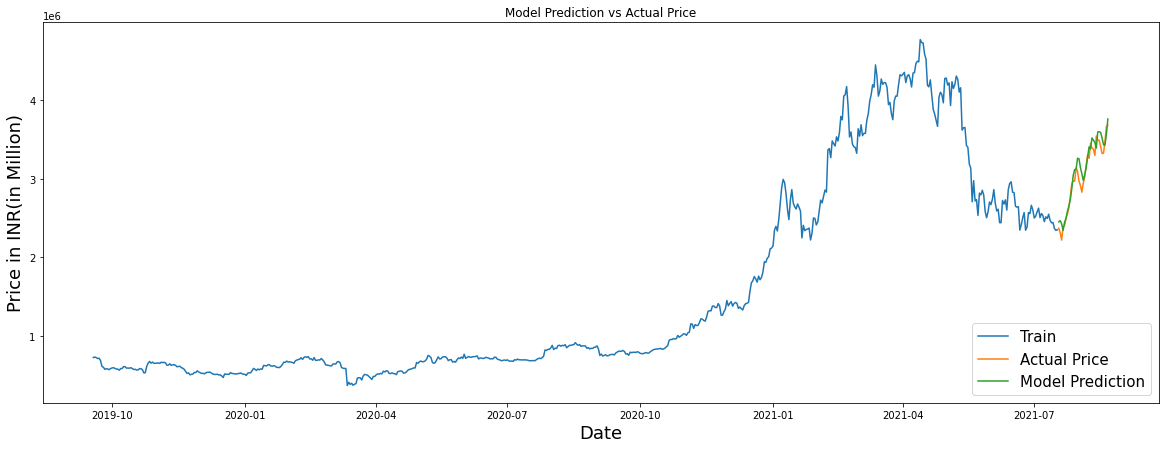

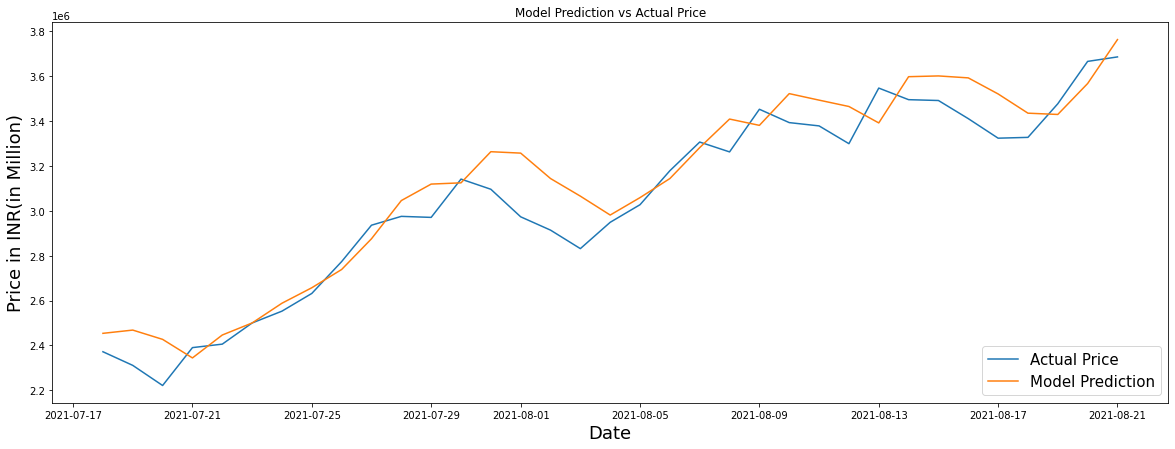

In [13]:
train_data=df[0:train_len]
valid_data=df[train_len:]
valid_data['predictions']=predictions
# valid_data.head()
plt.figure(figsize=(20,7))
plt.title("Model Prediction vs Actual Price")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Price in INR(in Million)",fontsize=18)
plt.plot(train_data['Close'])
plt.plot(valid_data['Close'])
plt.plot(valid_data['predictions'])
plt.legend(['Train','Actual Price','Model Prediction'],loc='lower right',fontsize=15)
plt.show()
plt.figure(figsize=(20,7))
plt.title("Model Prediction vs Actual Price")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Price in INR(in Million)",fontsize=18)
# plt.plot(train_data['Close'])
plt.plot(valid_data['Close'])
plt.plot(valid_data['predictions'])
plt.legend(['Actual Price','Model Prediction'],loc='lower right',fontsize=15)
plt.show()